# What is Statcast?
Statcast collects  data using high-resolution optical cameras along with radar equipment that has been installed in all 30 Major League ballparks since 2015. The technology  tracks the location and movements of the ball and every player on the field at any given time.

In this notebook I am going to analyze and visualize statcast data from Aaron Judge and Giancarlo Stanton. There are two CSV files, judge.csv and stanton.csv, both of which contain Statcast data for 2015-2017. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load the csv files into pandas dataframes
judge = pd.read_csv('judge.csv')
stanton = pd.read_csv('stanton.csv')

In [4]:
# Display all columns so pandas does not automatically collapse them
pd.set_option('display.max_columns', None)

# Display the last five rows of the Aaron Judge data
judge.tail(5)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


# Batted Ball Events
Batted ball events are any batted balls that produce an outcome. This means outs, hits, and errors. 

In [5]:
# All of Aaron Judge's batted ball events in 2017
judge_events_2017 = judge.loc[judge['game_year'] == 2017].events
print("Aaron Judge batted ball event totals, 2017:")
print(judge_events_2017.value_counts())

# All of Giancarlo Stanton's batted ball events in 2017
stanton_events_2017 = stanton.loc[stanton['game_year'] == 2017].events
print("\nGiancarlo Stanton batted ball event totals, 2017:")
print(stanton_events_2017.value_counts())

Aaron Judge batted ball event totals, 2017:
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
intent_walk                   11
hit_by_pitch                   5
field_error                    4
sac_fly                        4
fielders_choice_out            4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64

Giancarlo Stanton batted ball event totals, 2017:
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
grounded_into_double_play     13
intent_walk                   13
hit_by_pitch                   7
force_out                      7
field_error                    5
sac_fly             

We can see that the stats are similar, particularly home runs. Stanton and Judge led baseball in home runs in 2017, with 59 and 52, respectively. 

Now let us get into two statistics that were introduced by Statcast, launch angle and launch speed which I have defined below.

Launch angle: the vertical angle at which the ball leaves the bat
Launch speed: the speed of the baseball as it leaves the bat

In general, balls with a greater launch angle are more likely to result in a hit.

Text(0.5, 1.0, 'Giancarlo Stanton\nHome Runs, 2015-2017')

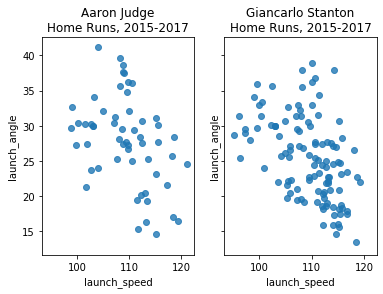

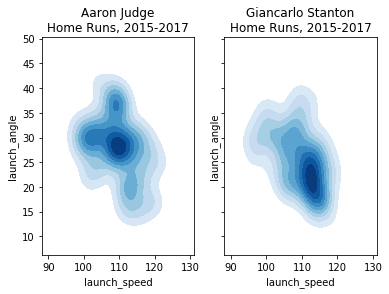

In [6]:
# Filter to include home runs only
judge_hr = judge.loc[judge['events'] == 'home_run']
stanton_hr = stanton.loc[stanton['events'] == 'home_run']

# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x="launch_speed", y="launch_angle", fit_reg=False, color='tab:blue', data=judge_hr, ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x="launch_speed", y="launch_angle", fit_reg=False, color='tab:blue', data=stanton_hr, ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# Create a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr.launch_speed, judge_hr.launch_angle, cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(stanton_hr.launch_speed, stanton_hr.launch_angle, cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

We can see from the charts that Stanton's homeruns generally have a lower launch speed and higher launch angle than Judge's homeruns.

Another important stat is release speed, how fast the ball leaves the pitchers hand before Stanton or Judge hit it. We can use this as another way to compare their homeruns.

Text(0.5, 1.0, 'Home Runs, 2015-2017')

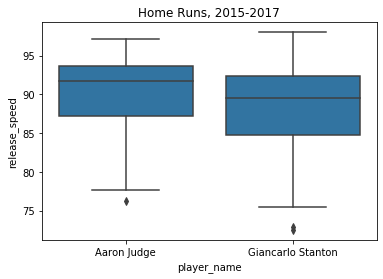

In [7]:
# Combine the Judge and Stanton home run DataFrames for easy boxplot plotting
judge_stanton_hr = pd.concat([judge_hr, stanton_hr])

# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(x='player_name', y='release_speed', data=judge_stanton_hr, color='tab:blue').set_title('Home Runs, 2015-2017')

Judge hits his homeruns on faster pitches than Stanton making him more of a fastball hitter. Statcast also tracks pitch location. The zone the pitch is in when it crosses the plate. The zone numbering goes from 1-14 with 11-14 being outside of the strikezone.  (Pictured below)

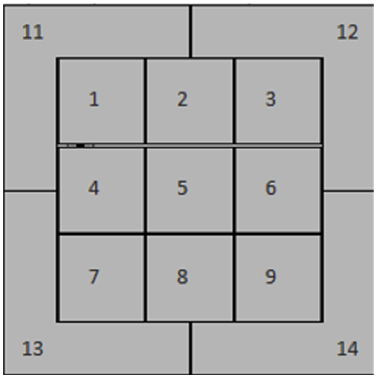

We can plot this with a 2D histogram on a 9x9 grid. We can view each zone as coordinates on a 2D plot, the bottom left corner being (1,1) and the top right corner being (3,3). Below I will setup a function to assign x coordinates to the strikezone.

In [8]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored since they are not in the strikezone.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3

In [9]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored since they are not in the strikezone.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

First we'll create our 2D histogram for Aaron Judge. Remember this is for pitches in the strike zone that resulted in a homerun.

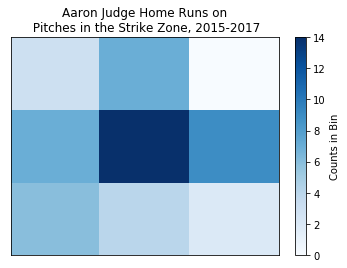

In [10]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'], judge_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

Next we can do the same for Giancarlo Stanton.

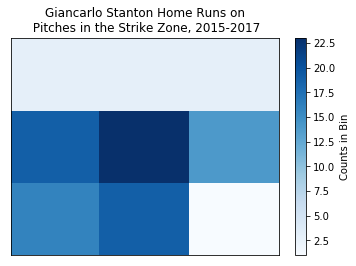

In [11]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Stanton home runs
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)


# Plot Stanton's home run zone as a 2D histogram with a colorbar
plt.hist2d(stanton_strike_hr['zone_x'], stanton_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

# Takeways:

Stanton does not hit many home runs on pitches in the upper third of the strike zone.

Both hitters favor the center of the strikezone.

Judge’s least favorite home run pitch appears to be high-away while Stanton’s appears to be low-away.

Stanton's preference for homeruns is the middle inside.

Judge's homeruns are a lot more spread out.

Stanton hits homeruns on slower pitches than Judge.

Even though both hitters had very similar homerun numbers their hitting profiles are completely different.  
Regardless, I would not want to pitch against either of these hitters.